<a href="https://colab.research.google.com/github/adamt645/Projects/blob/main/ML_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Author**

**Student Name**:  Adam Toth <br>
**Student ID**:  210505924

# **2. Problem formulation**
This assignment uses the MLEnd Hums and Whistles dataset and attempts to build a machine learning pipeline that takes as an input a Potter or a StarWars audio segment and predicts its song label (either Harry or StarWars). 
<br>
<br>
Listening to someone whistling or humming either the Harry Potter or StarWars theme song, and recognising which one is which, should be relatively easy for humans. Attempting to do the same with a computer is what this paper is about. 
<br>
<br>
The problem is interesting because (i) replicating human capabilities with computers is fun, (ii) similar methods could later be applied to identify human voices and match it with their 'owner' (and be applied to home security systems, phone lock releases, etc.), (iii) gives an overview of the necessary steps of a machine learning pipeline. 

# **3. Machine Learning pipeline**
`Insert picture of all steps that are going to be implemented.`


# **4. Transformation stage**
`Describe any transformations, such as feature extraction. Identify input and output`.

### **`1. Feature extraction --> dimensionality reduction`**
  `Before the following steps are considered, let's define what goal is to be achieved. Some predictor features and a target feature are needed to be extracted from the created dataframe. In the first (basic) part of this paper, this four predictor features are going to be:`<br>
* `Power`
* `Pitch mean`
* `Pitch standard deviation`
* `Fraction of voiced region`,

`whilst the target variable will be "song" (either Potter or StarWars).`

By extracting four features from our audio signals, we are reducing the original data's dimensionality and establishing a subset of the original attributes (feature selection), on which we can perform various operations (feature extraction). Based on these predictor features a later defined models will decide whether the song is Potter or StarWars.` 

Two functions are defined at this stage that will extract the required features from our audio signals. 

**1.** 'getPitch': gets the pitch of an audio signal

**2.** 'getXy': takes a number of files and creates a NumPy array containing the four audio features used as predictors (X) and a binary label (y), that indicates whether the song is Potter (y=1) or StarWars (y=0). The resulting shapes of X and y arrays are then:
* The shape of X is:  (832, 4)
* The shape of y is:  (832,)

### **`2. Feature Scaling`**
Feature scaling needs to be applied to the extracted predictors as they could be at different levels of magnitude (e.g., different scale) causing algorithms sensitive to scaling, such as SVM, to perform worse than otherwise and lead to incorrect model outcomes (e.g., if there are a few features that are dominant in magnitude, they would govern the model's results.  


From later drawn histograms of the predictor variables one can see that, e.g., 'Power' or 'Pitch Mean' values are scaled differently than the rest of the predictors; they are measured in different units (e.g., Hertz, Watt) therefore making them incommensurable.<br>

This project will scale features using 'Standard Scaling' (Z-score normalisation), making features' properties to have a standard normal distribution with mean of 0 and standard deviation of 1. 


# **5. Modeling**
`Describe the Machine Learning models that you will implement.`

* __Support Vector Machine__<br>
The Support Vector Machine (SVM) is a supervised, linear model for classification (and regression tasks). The SVM takes the predictor features as input, and creates a separating line (or hyperplane) as an output that separate the data into classes. Based on the finding of the SVM algorithm, one finds the points closes to the line from both the classes (where distances are called margins). These points are called support vectors.  The goal is to maximise the margins, resulting in a way where the separation between the two classes is as wide as possible. 

* __k-Nearest Neighbour algorithm__<br>
K-nearest neighbours (kNN) is a supervised Machine Learning model (learning from data that is already labelled). It takes in input objects (in our case, the four audio features extracted from the given recordings) and output values (Potter or Star Wars). The model is then trained on data to learn how to map the inputs to the desired output. The goal is that the model will make correct predictions on unseen data. 

kNN is an extension of nearest neighbours that proceeds as follows. Given a new sample x:
- We calculate the distance to all the training samples xi
- Extract the K closest samples (neighbours)
- Obtain the number of neighbours that belong to each class
- Assign the label of the most popular class among the neighbours. 

Since the model will be applied to a binary classification problem, K should be set as an odd number to prevent potential situations where among the K neighbours both classes are equally present, making the algorithm unable to decide what label to give to the analysed sample. 

# **6. Methodology**
#### **Strategy to evaluate the performance** (designed before creating models)
### **`Quality metric`** (quantifying the performance)<br>
The only operation that we can perform with categorical variables is **comparison**, i.e., we can assess whether y_i = y_hat_i is either true or false. 
    
By comparing predictions and true labels, we can identify in a dataset:
* The correctly classified samples (**true predictions**) in each class
* The incorrectly classified samples (**false predictions**) in each class

Two common and equivalent notions of quality are the **accuracy (A)** and the **error** (or misclassification) **rate** E = 1-A, defined as:
A = #correctly classified samples/#samples, E = #incorrectly classified samples/#samples. 

Using these notions of quality, the best classifier can be defined as the one with the higest accuracy (or the lowest misclassification rate). In non-lineary separable datasets, the accuracy of a lineary classifier is A < 1 (E>0). The best one will achieve the highest accuracy. 

Accuracy will be provided with regard to training and validation performance of the respective models (validation performance will be used to decide which ML model performed better; although, caution will have to be paid as these metrics are random quantities). 

      
### **`How data will be used (training and validation of models)`**

Machine learning uses datasets for different purposes, for instance to assess the deployment performance of a final model (test/validation dataset) or to tune a model (training dataset). 

Often, we need to explore different options before training a final model. 

#### **`1. Training`**
`Used to find the best values for the parameters of a model, i.e., to tune a model.`
We use a subset of data, known as the **training dataset**, to (implicitly or explicitly) **reconstruct** the error surface needed during optimisation. We will call this the **empirical error surface**. 


#### **`2. Validation`**
`Necessary to compare different modelling options and select the best one, the one that will be trained.`
**Validation methods** allow us to use data for **assessing and selecting** different families of models. The same data used for validation can then be used to train a final model. 

**Validation involves one or more training and performance estimation rounds per model family followed by performance averaging.**

#### **`3. Test`**
`This is the most important task. It allows us to estimate the deployment performance of the model.`

If we could use all the data that models can be shown (population), we would be able to quantify their **true deployment performance**. Instead, we use a **subset of the data, a test dataset (extracted randomly)**, to compute the **test deployment performance** as an **estimation** of the true performance.


Caution should be applied as the **test performance is itself random**, as different datasets generally produce different values --> some models might appear to be **superior by chance**. 
<br>
<br>
<br>
<br>
<br>

`Two model evaluation techniques will be used in this project.`
#### **`Train/test split procedure`**
The whole dataset is split into two pieces - on one piece we do the training of our model, whilst on the other piece of data we do the testing. During the training stage the model is not exposed to the test set, hence when it makes predictions on the test dataset, it can be taken as an indicator of the performance of the model. The splitting will be done using scikit learn with train_size=0.7, and test_size=0.3, whilst random_state=1. 

#### **`k-Fold Cross-Validation (for kNN model)`**
Cross-validation is when the dataset is randomly split up into 'k' groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group has been used as the test set. 

For example, for 5-fold cross-validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set. 

Cross-validation is better than using the holdout method (train_test_split) because the holdout method score is dependent on how the data is split into train and test sets. Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data (source: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a). 

`In both cases of 'train_test_split* and 'k-fold cross-validation' instances there will be an intermediate stage (validation) where the hyperparameters of the respective models will be tuned in order to get better predictions. The project will be using grid search: the method will be given a subset of parameters for each parameters of the respective models, after which the algorithm carries out an exhaustive search with all the permutation-combinations of the parameters and returns the parameters that provide the best results.`

`Moreover, besides acquiring accuracy of the models, confusion matrix will be provided after each models' findings to better visualise the results.`

# **7. Dataset**
The paper uses 832 given recordings of either hummings and whistlings of the most notable parts of the theme songs of either Harry Potter and Star Wars movies. Recordings are divided into two-two seperate zipped folders with respect to both songs. 
<br>
## **Step 1**<br>
As a first step, files are downloaded from a given url and uploaded into my Google Drive. 

## **Step 2**<br>
Next, files are downloaded locally to correct files names that do not follow the instructed naming conventions. Once the corrected files are uploaded back to the Google Drive, sample paths of the respective folders are set here in Google Colab. Files are then imported as lists (four of them). 

All four lists are then used to create Pandas Dataframes by extracting each instance's 'file_id', 'participant' (id of recorder), 'interpretation' (type as of either humming or whistling), 'interpretation number' (StarWars.wav/Potter.wav), and 'song' (Potter/StarWars). Once this is done, the dataframes are merged together.

In [1]:
# Loading necessary libraries
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm

import librosa

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/Public_Data/MLEndHW'
os.listdir(path)

['MLEndHW_Sample.zip',
 'Potter_1.zip',
 'Potter_2.zip',
 'StarWars_1.zip',
 'StarWars_2.zip',
 'Potter_1',
 'Potter_2',
 'StarWars_1',
 'StarWars_2',
 'Hakuna_1',
 'Mamma_1',
 'Rain_1',
 'Showman_1',
 'IMG_5050.jpg']

In [3]:
# Potter_1
sample_path = '/content/drive/MyDrive/Public_Data/MLEndHW/Potter_1/*.wav'
files1 = glob.glob(sample_path)
print(len(files1))

# Potter_2
sample_path2 = '/content/drive/MyDrive/Public_Data/MLEndHW/Potter_2/*.wav'
files2 = glob.glob(sample_path2)
print(len(files2))

# StarWars_1
sample_path3 = '/content/drive/MyDrive/Public_Data/MLEndHW/StarWars_1/*.wav'
files3 = glob.glob(sample_path3)
print(len(files3))

# StarWars_2
sample_path4 = '/content/drive/MyDrive/Public_Data/MLEndHW/StarWars_2/*.wav'
files4 = glob.glob(sample_path4)
print(len(files4))
print(type(files4))

210
205
210
207
<class 'list'>


In [4]:
# Potter_1
MLENDHW_table = [] 

for file in files1:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[-1]
  song = file.split('/')[-1].split('_')[-1].split('.')[0]
  MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df.head()

,participant,interpretation,number,song
file_id,,,,
S103_hum_2_Potter.wav,S103,hum,Potter.wav,Potter
S40_hum_2_Potter.wav,S40,hum,Potter.wav,Potter
S40_whistle_2_Potter.wav,S40,whistle,Potter.wav,Potter
S103_whistle_2_Potter.wav,S103,whistle,Potter.wav,Potter
S17_hum_1_Potter.wav,S17,hum,Potter.wav,Potter


In [5]:
# Potter_2
MLENDHW_table2 = [] 

for file in files2:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[-1]
  song = file.split('/')[-1].split('_')[-1].split('.')[0]
  MLENDHW_table2.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_df2 = pd.DataFrame(MLENDHW_table2,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df2.head()

,participant,interpretation,number,song
file_id,,,,
S202_hum_2_Potter.wav,S202,hum,Potter.wav,Potter
S129_whistle_2_Potter.wav,S129,whistle,Potter.wav,Potter
S193_hum_2_Potter.wav,S193,hum,Potter.wav,Potter
S121_hum_1_Potter.wav,S121,hum,Potter.wav,Potter
S193_whistle_2_Potter.wav,S193,whistle,Potter.wav,Potter


In [6]:
# StarWars_1
MLENDHW_table3 = [] 

for file in files3:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[-1]
  song = file.split('/')[-1].split('_')[-1].split('.')[0]
  MLENDHW_table3.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_df3 = pd.DataFrame(MLENDHW_table3,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df3.head()

,participant,interpretation,number,song
file_id,,,,
S88_hum_2_StarWars.wav,S88,hum,StarWars.wav,StarWars
S88_hum_1_StarWars.wav,S88,hum,StarWars.wav,StarWars
S100_hum_4_StarWars.wav,S100,hum,StarWars.wav,StarWars
S100_hum_3_StarWars.wav,S100,hum,StarWars.wav,StarWars
S21_hum_4_StarWars.wav,S21,hum,StarWars.wav,StarWars


In [7]:
# StarWars_2
MLENDHW_table4 = [] 

for file in files4:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[-1]
  song = file.split('/')[-1].split('_')[-1].split('.')[0]
  MLENDHW_table4.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_df4 = pd.DataFrame(MLENDHW_table4,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df4.head()

,participant,interpretation,number,song
file_id,,,,
S198_hum_2_StarWars.wav,S198,hum,StarWars.wav,StarWars
S190_hum_2_StarWars.wav,S190,hum,StarWars.wav,StarWars
S198_whistle_2_StarWars.wav,S198,whistle,StarWars.wav,StarWars
S122_hum_2_StarWars.wav,S122,hum,StarWars.wav,StarWars
S190_whistle_2_StarWars.wav,S190,whistle,StarWars.wav,StarWars


In [8]:
# Merging data from different folders and dataframes
files = files1 + files2 + files3 + files4

dataframes = [MLENDHW_df, MLENDHW_df2, MLENDHW_df3, MLENDHW_df4]
final_df = pd.concat(dataframes)
final_df

,participant,interpretation,number,song
file_id,,,,
S103_hum_2_Potter.wav,S103,hum,Potter.wav,Potter
S40_hum_2_Potter.wav,S40,hum,Potter.wav,Potter
S40_whistle_2_Potter.wav,S40,whistle,Potter.wav,Potter
S103_whistle_2_Potter.wav,S103,whistle,Potter.wav,Potter
S17_hum_1_Potter.wav,S17,hum,Potter.wav,Potter
...,...,...,...,...
S138_hum_1_StarWars.wav,S138,hum,StarWars.wav,StarWars
S138_whistle_1_StarWars.wav,S138,whistle,StarWars.wav,StarWars
S208_whistle_2_StarWars.wav,S208,whistle,StarWars.wav,StarWars


## **Step 3**<br>
At this point, a quick check is due to see whether each songs are represented roughly equally.<br>




In [9]:
# Checking if dataset is balanced with respect to songs (Potter or StarWars)
final_df['song'].value_counts()

StarWars     413
Potter       411
Potter         4
Starwars       2
hum3           1
StartWars      1
Name: song, dtype: int64

In [10]:
# Function gets the pitch of an audio signal
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag


In [11]:
# Extracting four audio features as predictor variables (X) and a binary label (y)
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    #print(file_name)
    #print(labels_file.loc[fileID]['interpretation'])
    #print(labels_file.loc[fileID]['interpretation']=='hum')
    #yi = list(labels_file.loc[fileID]['interpretation'])[0]=='hum'
    yi = labels_file.loc[fileID]['song']=='Potter'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

In [12]:
# Iterating through all instances in dataframe, deriving the 4 pre-specified predictor features (X)
# and target variable y (either Potter or StarWars)
X,y = getXy(files, labels_file=final_df, scale_audio=True, onlySingleDigit=True)

  3%|▎         | 24/832 [01:29<49:58,  3.71s/it]


KeyboardInterrupt: ignored

In [ ]:
from numpy import asarray
from numpy import savetxt

# Save X and to csv
savetxt('X.csv', X, delimiter=',')

In [ ]:
savetxt('y.csv', y, delimiter=',')

In [17]:
from numpy import genfromtxt
X = genfromtxt('X.csv', delimiter=',')
y = genfromtxt('y.csv', delimiter=',')

In [18]:
print(X[0:5])
print()
# Converting boolean y values into integers (where True=1=Potter, False=0=StarWars)
y = y.astype(int)
print(y[0:5])

[[2.02235117e-02 1.64102638e+02 2.76965478e+01 6.31507776e-01]
 [1.71861343e-02 2.02538778e+02 4.85056901e+01 6.54810024e-01]
 [4.16404837e-03 3.93561321e+02 3.20134046e+01 6.51045422e-01]
 [5.77912653e-03 3.85549035e+02 2.88461611e+01 5.67370721e-01]
 [2.73457166e-02 2.59445836e+02 6.84512297e+01 7.38304094e-01]]

[1 1 1 1 1]


In [19]:
# Converting X into pandas dataframe for visualisation
dataset = pd.DataFrame({'Power': X[:, 0], 
                        'Pitch Mean': X[:, 1],
                        'Pitch s.d': X[:, 2], 
                        'Fract.of voiced region': X[:, 3],
                        'Target': y,
                        'Song': final_df['song']})

dataset.head()

,Power,Pitch Mean,Pitch s.d,Fract.of voiced region,Target,Song
file_id,,,,,,
S103_hum_2_Potter.wav,0.020224,164.102638,27.696548,0.631508,1,Potter
S40_hum_2_Potter.wav,0.017186,202.538778,48.505690,0.654810,1,Potter
S40_whistle_2_Potter.wav,0.004164,393.561321,32.013405,0.651045,1,Potter
S103_whistle_2_Potter.wav,0.005779,385.549035,28.846161,0.567371,1,Potter
S17_hum_1_Potter.wav,0.027346,259.445836,68.451230,0.738304,1,Potter


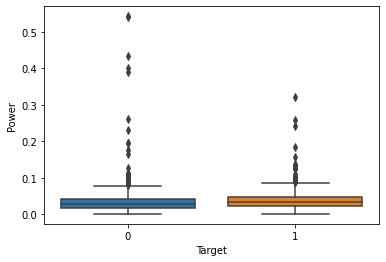

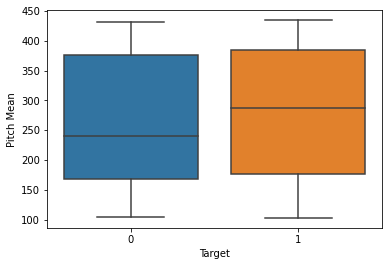

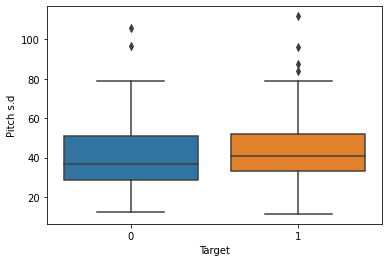

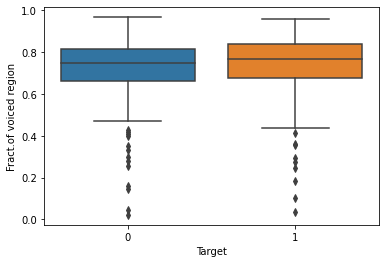

In [20]:
# Visualising extracted features
# Boxplots
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=dataset.Target, y=dataset.Power)
plt.show()

sns.boxplot(x=dataset.Target, y=dataset['Pitch Mean'])
plt.show()

sns.boxplot(x=dataset.Target, y=dataset['Pitch s.d'])
plt.show()

sns.boxplot(x=dataset.Target, y=dataset['Fract.of voiced region'])
plt.show()

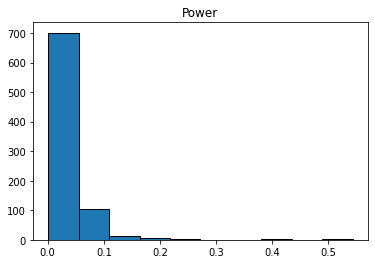

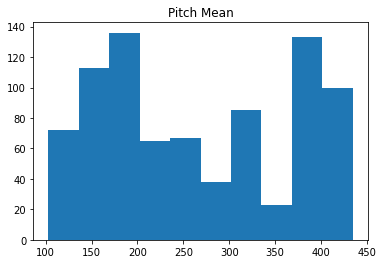

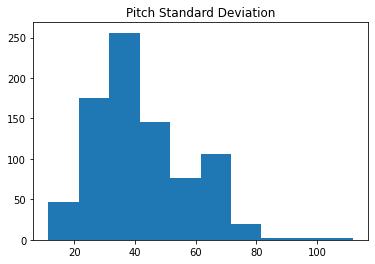

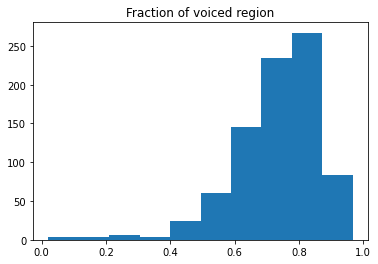

In [21]:
# Histograms
plt.hist(x=dataset.Power, edgecolor='black')
plt.title("Power")
plt.show()

plt.hist(x=dataset['Pitch Mean'])
plt.title("Pitch Mean")
plt.show()

plt.hist(x=dataset['Pitch s.d'])
plt.title("Pitch Standard Deviation")
plt.show()

plt.hist(x=dataset['Fract.of voiced region'])
plt.title("Fraction of voiced region")
plt.show()



# **8 Results**

# **Support Vector Machine**

Let's build a support vector machine (SVM) model for the predictive task of identifying whether a recording is a Potter or Starwars song, using the dataset that we have just created. 

We will use the SVM method provided by scikit-learn and will split the dataset defined by X and y into a training set and a validation set. 

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
# Normalising data
mean = X_train.mean(0)
sd =  X_train.std(0)
X_train = (X_train-mean)/sd
X_test  = (X_test-mean)/sd

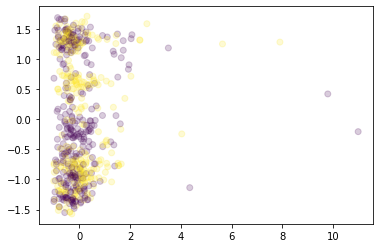

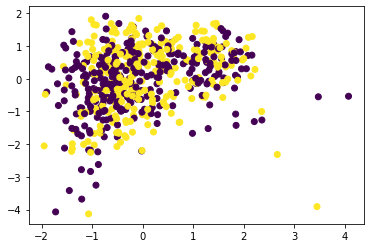

In [24]:
from matplotlib.colors import ListedColormap
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.2)
plt.show()

plt.scatter(X_train[:,2], X_train[:, 3], c=y_train)
plt.show()


In [25]:
# Training the model and evaluation of its performance
model = SVC()
model.fit(X_train, y_train)
print("Accuracy on training data is ", model.score(X_train, y_train))
print("Accuracy on testing data is ", model.score(X_test, y_test))

Accuracy on training data is  0.6580756013745704
Accuracy on testing data is  0.6


About SVM's parameters: 
* **C** parameter adds a penalty for each misclassified data point. If C is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassifications. 

* **Gamma** parameter controls the distance of influence of a single training point. Low values of gamme indicates a large similarity radius which results in more points being grouped together. For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit.

In [27]:
# Tuning hyperparameters (C, kernel [and degree where applicable]) using GridSearchCV *
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1, 0.5, 1, 2], 
            'kernel':['rbf', 'sigmoid', 'linear'], 
            'gamma': [1, 2]}

grid=GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 2], 'gamma': [1, 2],
                         'kernel': ['rbf', 'sigmoid', 'linear']})

In [28]:
print(grid.best_params_)
print("The score on the training dataset is: ",grid.score(X_train, y_train))
print("The score on the test dataset is: ",grid.score(X_test, y_test))

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
The score on the training dataset is:  0.7250859106529209
The score on the test dataset is:  0.648


# **K-Nearest Neighbours**

# **Training the kNN model**

Instead of the usual train and test split which you may be used to seeing, it is better to use k-fold cross-validation on the training data to get our initial predictions. This works by shuffling the dataset randomly, then splitting it into k number of sections (folds). For this example, I have chosen k = 10. So, the k-folds algorithm isolates one fold, using it as a test set. The other nine folds constitute the training data. The kNN model is then fitted on the training set and evaluated on the test set, saving the evaluation score and discarding the model. This process is then repeated ten times, with a different fold used as the test set. This results in each fold being used in the training data nin (k-1) timesm and as the testing set once. 

In [29]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


# Scaling data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# Split dataset into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [36]:
from sklearn.model_selection import GridSearchCV
# Tuning hyperparameter 'k_neighbors' by applying GridSearch
# Create a new kNN model
knn_grid = KNeighborsClassifier()

# Create a dictionary of all values that we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

# Use gridsearch to test all values for n_neighbours
knn_gscv = GridSearchCV(knn_grid, param_grid, cv=10)

# Fit model to training data
knn_gscv.fit(X_train, y_train)

# Check top performing n_neighbors value
print("The best performing n_neighbors value is: ", knn_gscv.best_params_, "with mean accuracy score of: ",
      knn_gscv.best_score_)

The best performing n_neighbors value is:  {'n_neighbors': 17} with mean accuracy score of:  0.6165762098597919


In [38]:
# Create KNN classifier with the best performing n_neighbors(=16)
knn_first = KNeighborsClassifier(n_neighbors = 17)

# Cross validate
cv_scores = cross_val_score(knn_first, X_train, y_train, cv=10)

# Taking the mean value of cross-validation rounds
cv_scores_mean = np.mean(cv_scores)
print("The cross-validation results in terms of accuracy are: ", cv_scores ,"\n" 
      "whilst the mean of these result is ","{:.3f}".format(cv_scores_mean))


The cross-validation results in terms of accuracy are:  [0.58208955 0.59701493 0.53731343 0.65671642 0.68656716 0.66666667
 0.62121212 0.65151515 0.63636364 0.53030303] 
whilst the mean of these result is  0.617


Taking an average of the cross-validation scores, the **accuracy** of our model on the training set is 63%. Not bad. 

Next, we are going to fit the kNN model to the test set. 

In [39]:
# Fit the model to the testing data 
knn_first.fit(X_test, y_test)
predictions = knn_first.predict(X_test)

# Check accuracy of the model on the test dataset
accuracy_score = knn_first.score(X_test, y_test) 
print("Accuracy score on the test data = ""{:.2f}".format(accuracy_score))

Accuracy score on the test data = 0.63


Minimum error:- 0.31137724550898205 at K = 15


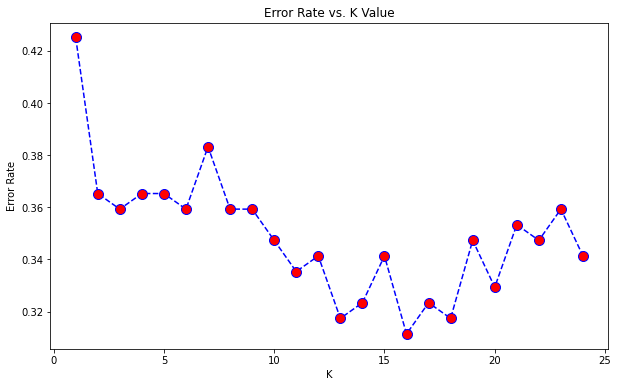

In [40]:
# Visualising error rate of the model
error_rate = []
for i in range(1,25):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.688622754491018 at K = 15


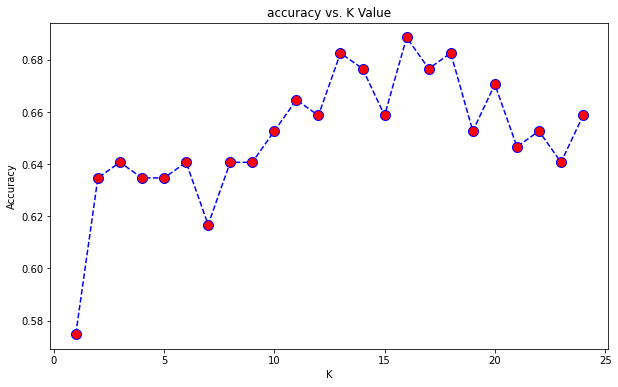

In [41]:
# Visualising accuracy of the model
acc = []
from sklearn import metrics
for i in range(1,25):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,25),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

We can visualise the model's performance using a confusion matrix. 

The confusion matrix describes the performance of our kNN classification model. A true positive tells us when the algorithm predicted 1 and the actuall class was 1. A false positive tells us when the model predicts 1, and the actual class was 0. The reverse applies for true negatives and false negatives.

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[45, 40],
       [21, 61]])

In [43]:
y_actual = pd.Series(y_test, name='Actual')
y_predicted = pd.Series(predictions, name='Predicted')

# Create confusion matrix
print(pd.crosstab(y_actual, y_predicted))
print()
# Accuracy of model (percentage of correct predictions)
print("The accuracy of the model is: ", metrics.accuracy_score(y_actual, y_predicted))
print()
# Precision of the model (correct positive predictions relative to total positive predictions)
print("The precision of the model is: ", metrics.precision_score(y_actual, y_predicted))
print()
# Recall value of the model (correct positive predictions relative to total actual positives)
print("The recall value of the model is: ", metrics.recall_score(y_actual, y_predicted))

Predicted   0   1
Actual           
0          45  40
1          21  61

The accuracy of the model is:  0.6347305389221557

The precision of the model is:  0.6039603960396039

The recall value of the model is:  0.7439024390243902


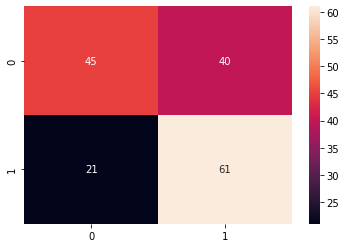

In [44]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

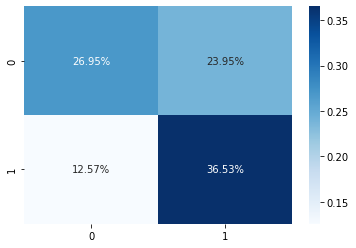

In [45]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,
            fmt='.2%', cmap='Blues')

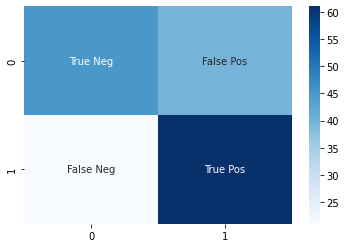

In [46]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt="", cmap='Blues')

# **9. Conclusions**